In [17]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation


# 1D Random Walk

In [18]:
N = 10**4
steps = 2*np.random.randint(0,high = 2,size = N) -1

In [19]:
position=np.cumsum(steps)
position

array([ 1,  0,  1, ..., 54, 53, 54], dtype=int32)

In [20]:
print(f'Maximum distance = {position.max()} at {position.argmax()}th step')
print(f'Minimum distance = {position.min()} at {position.argmin()}th step')

Maximum distance = 88 at 9811th step
Minimum distance = -50 at 1023th step


In [21]:
print(f' x = 20 reached at steps {np.where(position == 20)}')

 x = 20 reached at steps (array([4289, 4291, 4293, 4301, 4993, 4997, 4999, 5003, 5011, 5017, 5031,
       5037, 5039, 5077, 5079, 5081, 5085, 5089, 5091, 5093, 5097, 5179,
       5181, 5187, 5189, 5191, 5223, 5233, 5237, 5409, 5413, 5417, 5423,
       5425, 5431, 5435, 5453, 5455, 5689, 5695, 5697, 5699, 5713, 5715,
       5719, 5721, 5723, 5725, 5727, 5729, 5731, 5733, 5739, 5751, 5753,
       5755, 5779, 5891, 5901, 5903, 5905, 5907, 5909, 5923, 5925, 5927,
       6021, 6025, 6053, 6055, 6061, 6299, 6303, 6307, 6315, 6317, 7659,
       7661, 7663, 7665, 7683, 7685, 7687, 7725, 7727, 7729, 8075, 9285,
       9287, 9289, 9357, 9359, 9361, 9367], dtype=int64),)


In [22]:
index=np.asarray(np.linspace(0,N,N))

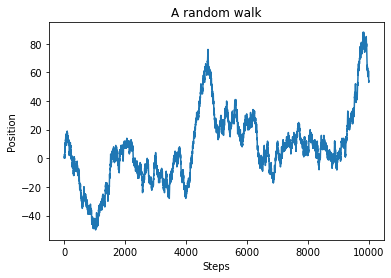

In [23]:
plt.title('A random walk')
plt.ylabel('Position')
plt.xlabel('Steps')
plt.plot(position)
plt.show()

<IPython.core.display.Javascript object>


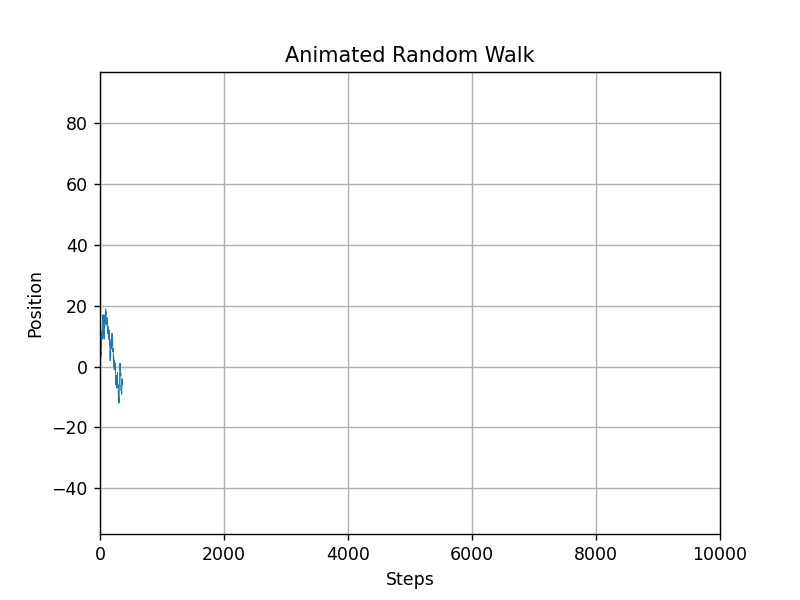

In [24]:
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N), ylim=(1.1*position.min(),1.1*position.max()))
ax.grid()
ax.set_xlabel('Steps')
ax.set_ylabel("Position")
plt.title('Animated Random Walk')

line = ax.plot(index[0], position[0], '-', lw=0.5)
def update_plots(i):
    # Draw the i-th position
    line[0].set_data(index[:i], position[:i])
    # Return a tuple
    return line[0],

anim = animation.FuncAnimation(fig, update_plots, np.arange(1, len(position)), interval=1, blit=True, repeat=True)
plt.show()

# Statistics on 1D Random Walk

In [25]:
N = 10**3
steps = 2*np.random.randint(0,high = 2,size = (N,N)) -1
steps.shape

(1000, 1000)

In [26]:
positions=np.cumsum(steps,axis=1)
positions.shape

(1000, 1000)

In [27]:
max=(positions.max(axis=1)).max()
print(f'The final position of the {(positions.max(axis=1)).argmax()}-th walker is {max}')

The final position of the 515-th walker is 105


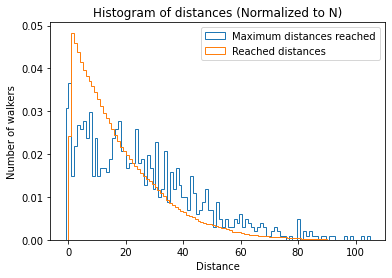

In [28]:
%matplotlib inline

n, bins, patches = plt.hist(positions.max(axis=1),bins=max,histtype = 'step', density = True, label = 'Maximum distances reached' )

n, bins, patches = plt.hist(abs(positions.flatten()),bins=max,histtype = 'step', density = True, label = 'Reached distances')

plt.xlabel('Distance')
plt.ylabel('Number of walkers')
plt.title('Histogram of distances (Normalized to N)')
plt.legend()
plt.show()

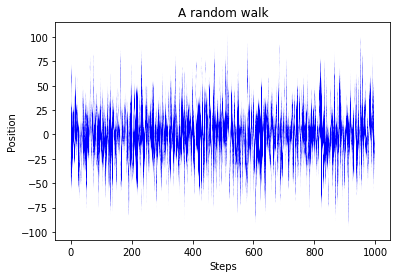

In [29]:
plt.title('A random walk')
plt.ylabel('Position')
plt.xlabel('Steps')
plt.plot(positions, lw = 0.012,alpha = 0.08, color = 'blue')
plt.show()

<IPython.core.display.Javascript object>


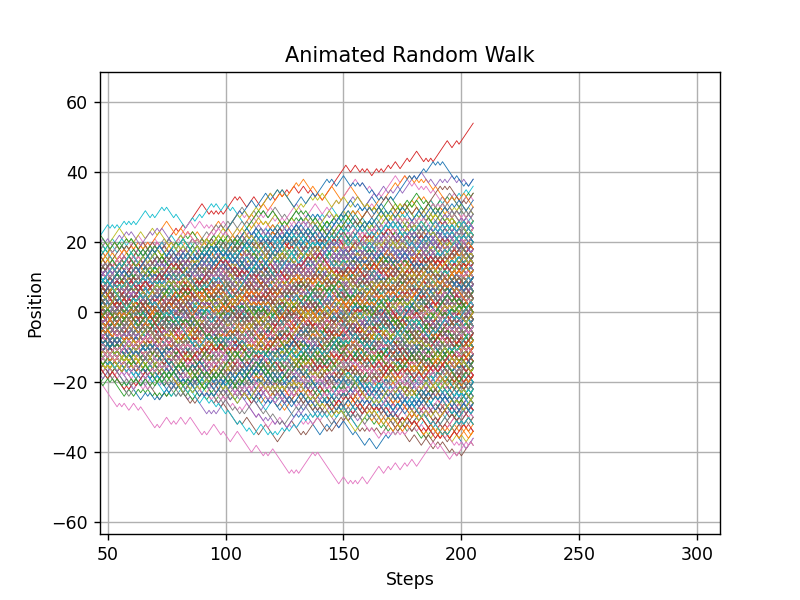

In [30]:
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N), ylim=(1.1*positions.min(),1.1*positions.max()))
ax.grid()
ax.set_xlabel('Steps')
ax.set_ylabel("Position")
plt.title('Animated Random Walk')


lines = [ax.plot(index[0], positions[j,0], '-', lw=0.5)[0] for j in range(N)]
def update_plots(i):
    # Draw the i-th position
    for j in range(N):
        lines[j].set_data(index[:i], positions[j,:i])
        # Return a tuple
    return lines,

anim = animation.FuncAnimation(fig, update_plots, np.arange(1, N), interval=0.1, blit=True, repeat=True)
plt.show()